In [1]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 26.3 MB/s eta 0:00:00


In [2]:
import torch
import warnings
import os
from IPython.display import display, Image
from roboflow import Roboflow
from google.colab import drive
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
drive.mount('/content/drive')
path_data = '/content/drive/My Drive/Colab Notebooks/IDSS_LEARN/SKIN_CANCER'

Mounted at /content/drive


In [4]:
os.listdir(path_data)

['YoloV5.ipynb',
 'YoloV7.ipynb',
 'YoloV9.ipynb',
 'runs.zip',
 'YoloV11.ipynb',
 'YoloV10s.ipynb']

In [5]:
rf = Roboflow(api_key="nWr9KTX5ZS7RpXl1PycI")
project = rf.workspace("comvis-kuueo").project("skin_lesion_detection-bvzqy")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin_Lesion_Detection-2 in yolov11:: 100%|██████████| 7012/7012 [00:00<00:00, 9361.53it/s]


In [6]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolov10s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/content/Skin_Lesion_Detection-2/data.yaml", epochs=100, imgsz=640)


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/Skin_Lesion_Detection-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 29.3MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


AMP: checks passed ✅


train: Scanning /content/Skin_Lesion_Detection-2/train/labels... 2800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2800/2800 [00:01<00:00, 1958.45it/s]


train: New cache created: /content/Skin_Lesion_Detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Skin_Lesion_Detection-2/valid/labels... 350 images, 1 backgrounds, 0 corrupt: 100%|██████████| 350/350 [00:00<00:00, 1072.76it/s]

val: New cache created: /content/Skin_Lesion_Detection-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.22G      2.613       7.44      3.114         41        640: 100%|██████████| 175/175 [01:15<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        350        355      0.373      0.467      0.397      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.17G      2.767      3.991      3.072         30        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        350        355      0.502      0.314      0.217       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.17G      2.804      3.778      3.081         26        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        350        355      0.353       0.37      0.306      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.17G      2.734      3.507      2.994         37        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.417      0.576      0.467      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.16G      2.708      3.503      3.006         33        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        350        355      0.479      0.576      0.501      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.17G      2.606      3.222      2.903         26        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]

                   all        350        355      0.579      0.621      0.575      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.17G       2.58      3.167      2.876         34        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]

                   all        350        355      0.494      0.684      0.567      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.17G      2.582      3.077      2.872         31        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s]

                   all        350        355        0.5      0.616      0.508      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.32G      2.557      2.992      2.872         37        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]

                   all        350        355      0.534       0.66      0.598      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.17G      2.496      2.929      2.824         28        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]

                   all        350        355      0.495      0.611      0.585      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.17G      2.496      2.908      2.815         28        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]

                   all        350        355      0.623      0.701      0.683      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.17G      2.429      2.779      2.782         31        640: 100%|██████████| 175/175 [01:12<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.90it/s]

                   all        350        355      0.569      0.666      0.652      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.16G      2.378      2.702      2.748         40        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.20it/s]

                   all        350        355      0.683      0.735      0.732      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.17G      2.413      2.695      2.781         36        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        350        355      0.648      0.756      0.723      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.17G      2.364      2.662      2.748         32        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.549      0.592      0.565      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.17G      2.358      2.626       2.73         29        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.69it/s]

                   all        350        355      0.621       0.69      0.708      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.16G      2.305      2.554      2.718         27        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.26it/s]

                   all        350        355      0.656      0.731      0.756      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.17G       2.31      2.545      2.703         33        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        350        355      0.588      0.693      0.699      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.17G      2.294       2.48      2.686         27        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]

                   all        350        355      0.674      0.713      0.747      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.17G      2.289      2.498      2.702         24        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.692      0.747       0.77      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.16G      2.253      2.447      2.659         30        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]

                   all        350        355      0.687      0.718      0.759      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.17G      2.305      2.393      2.714         29        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        350        355      0.587      0.743      0.723      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.17G      2.248       2.37      2.665         35        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]

                   all        350        355      0.659      0.696      0.715       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.17G      2.255      2.335      2.668         31        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        350        355      0.593      0.757      0.717      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.16G      2.206      2.253      2.608         36        640: 100%|██████████| 175/175 [01:12<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.27it/s]

                   all        350        355      0.709      0.795      0.805       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.17G      2.243      2.304      2.632         27        640: 100%|██████████| 175/175 [01:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]

                   all        350        355      0.637      0.766       0.72      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.17G      2.192      2.264       2.62         38        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]

                   all        350        355      0.801      0.644      0.771      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.17G      2.209      2.287      2.654         41        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        350        355       0.68      0.716      0.736      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.16G      2.218      2.171      2.627         31        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        350        355      0.676      0.766       0.75      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.17G      2.173      2.156      2.597         33        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]

                   all        350        355      0.652      0.741      0.734      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.17G      2.156      2.122      2.575         37        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        350        355      0.779      0.695      0.778       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.17G      2.207       2.19      2.627         39        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        350        355      0.648      0.616      0.657      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.16G      2.149      2.123      2.581         43        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]

                   all        350        355      0.726      0.744       0.76      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.17G       2.18       2.16      2.598         35        640: 100%|██████████| 175/175 [01:12<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]

                   all        350        355      0.699      0.727      0.773      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.17G      2.167      2.095      2.595         37        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]

                   all        350        355      0.767      0.744      0.789      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.17G      2.112      2.073      2.552         34        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355       0.76      0.798      0.806      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.16G      2.082      2.029      2.551         38        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.665       0.79      0.791      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.17G      2.101      2.039      2.553         38        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        350        355      0.722      0.727      0.764      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.17G      2.132      2.006      2.576         33        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.29it/s]

                   all        350        355      0.756       0.76      0.807      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.17G      2.097       1.95      2.544         33        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]

                   all        350        355      0.714      0.801      0.822      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.16G      2.072      1.996      2.543         25        640: 100%|██████████| 175/175 [01:12<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.92it/s]

                   all        350        355      0.754      0.733      0.795      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.17G      2.093       1.95      2.543         37        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]

                   all        350        355       0.71      0.824      0.815      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.17G      2.076      1.947       2.56         40        640: 100%|██████████| 175/175 [01:15<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        350        355      0.758      0.806      0.828      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.17G      2.027      1.858      2.502         37        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        350        355      0.802      0.766      0.827      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.32G      2.072      1.876      2.535         26        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.94it/s]

                   all        350        355      0.742      0.759      0.813      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.17G       2.03      1.861      2.513         31        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        350        355      0.755       0.72      0.783      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.17G      2.036      1.861       2.52         40        640: 100%|██████████| 175/175 [01:16<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.23it/s]

                   all        350        355      0.741      0.818      0.839      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.17G      2.023      1.815      2.503         32        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        350        355      0.809      0.751      0.841      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.16G      2.034       1.86      2.519         35        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.724      0.732      0.793      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.17G      1.984      1.757      2.481         31        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.727      0.805      0.822      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.17G      2.049      1.783      2.512         44        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s]

                   all        350        355      0.799       0.73      0.811      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.17G      2.006      1.756      2.486         34        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]

                   all        350        355      0.761      0.823       0.84      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.16G      2.014       1.76      2.508         36        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        350        355      0.804      0.765      0.837      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.17G      1.989      1.737       2.48         33        640: 100%|██████████| 175/175 [01:12<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]

                   all        350        355      0.793      0.794      0.853      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.17G      1.992      1.719      2.474         29        640: 100%|██████████| 175/175 [01:12<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        350        355      0.732      0.752      0.811       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.17G      1.977        1.7      2.466         35        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.743      0.786      0.811      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.16G      1.982      1.717      2.474         34        640: 100%|██████████| 175/175 [01:14<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.739      0.828      0.822      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.17G      1.988      1.712      2.495         37        640: 100%|██████████| 175/175 [01:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]

                   all        350        355      0.808      0.784      0.842      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.17G      1.951      1.647      2.446         37        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.29it/s]

                   all        350        355      0.847      0.751      0.842      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.17G      1.957      1.649      2.462         35        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.29it/s]

                   all        350        355      0.798      0.813      0.835      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.16G      1.979      1.654      2.466         31        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        350        355      0.757      0.829      0.849      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.17G      1.909      1.592      2.441         25        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]

                   all        350        355       0.76       0.76      0.822      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.17G      1.945      1.589      2.442         40        640: 100%|██████████| 175/175 [01:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.826       0.82      0.859      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.17G      1.923      1.546      2.438         25        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        350        355      0.758      0.836      0.843      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.16G      1.904      1.532      2.427         37        640: 100%|██████████| 175/175 [01:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s]

                   all        350        355      0.793       0.81      0.841      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.17G      1.876      1.502      2.418         33        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.00it/s]

                   all        350        355      0.745      0.827      0.842       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.17G      1.874      1.494      2.417         32        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]

                   all        350        355      0.748      0.805      0.816      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.17G      1.872      1.514      2.422         28        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        350        355      0.796      0.805      0.833      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.32G      1.871      1.502      2.409         30        640: 100%|██████████| 175/175 [01:15<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]

                   all        350        355      0.774      0.789      0.822      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.17G      1.843      1.492      2.403         39        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]

                   all        350        355      0.819      0.814      0.878      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.17G      1.822      1.442      2.389         26        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        350        355      0.827      0.814      0.863      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.17G      1.847      1.425      2.383         35        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        350        355      0.818      0.785      0.862       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.16G      1.824      1.393      2.392         36        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.821      0.841      0.875      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.17G       1.82      1.424      2.397         32        640: 100%|██████████| 175/175 [01:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        350        355      0.823      0.812      0.861      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.17G       1.82      1.357      2.393         27        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.26it/s]

                   all        350        355      0.802      0.851      0.863       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.17G      1.797      1.389      2.368         41        640: 100%|██████████| 175/175 [01:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.89it/s]

                   all        350        355      0.782      0.839      0.869       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.16G      1.773      1.311      2.336         34        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        350        355      0.794      0.804      0.857      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.17G      1.795      1.378      2.367         21        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        350        355      0.794      0.851      0.874      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.17G       1.79      1.324      2.365         35        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s]

                   all        350        355      0.792      0.779      0.852      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.17G      1.758       1.31      2.325         37        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]

                   all        350        355      0.839      0.813      0.878      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.32G      1.778      1.313      2.359         27        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.23it/s]

                   all        350        355      0.793      0.842      0.872      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.17G      1.796      1.312      2.367         28        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        350        355      0.791      0.821      0.858      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.17G       1.76      1.284      2.349         29        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]

                   all        350        355      0.796       0.83      0.859      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.17G      1.744      1.306      2.334         39        640: 100%|██████████| 175/175 [01:12<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]

                   all        350        355       0.79      0.786      0.851      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.16G      1.724      1.249      2.317         40        640: 100%|██████████| 175/175 [01:12<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]

                   all        350        355      0.846      0.813      0.862      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.17G      1.735      1.275      2.341         31        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        350        355      0.823      0.832      0.883      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.17G       1.69      1.209      2.312         44        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        350        355      0.751      0.838      0.851      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.17G      1.703      1.241       2.32         30        640: 100%|██████████| 175/175 [01:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        350        355       0.84      0.823      0.885      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.32G      1.695      1.188      2.311         41        640: 100%|██████████| 175/175 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        350        355      0.796      0.825      0.858      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.17G      1.693      1.181      2.312         36        640: 100%|██████████| 175/175 [01:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.91it/s]

                   all        350        355      0.805      0.833      0.858      0.628


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.17G      1.429     0.8402      2.225         18        640: 100%|██████████| 175/175 [01:15<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        350        355      0.775      0.828      0.853      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.17G      1.396     0.7743      2.208         17        640: 100%|██████████| 175/175 [01:12<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        350        355      0.819      0.812       0.87      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.17G      1.372     0.7128      2.195         18        640: 100%|██████████| 175/175 [01:12<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.22it/s]

                   all        350        355      0.806      0.836      0.869      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.18G      1.374     0.7079      2.186         17        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        350        355      0.844      0.834      0.874      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.17G      1.359     0.7019      2.163         19        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        350        355      0.769      0.838       0.86      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.17G      1.341     0.7094      2.168         17        640: 100%|██████████| 175/175 [01:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]

                   all        350        355      0.789      0.826      0.853      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.17G      1.335     0.6903      2.151         16        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        350        355      0.835      0.847      0.874       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.17G      1.311     0.6585      2.148         16        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.80it/s]

                   all        350        355      0.826      0.862       0.87       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.17G      1.288     0.6497      2.115         16        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        350        355      0.819      0.856      0.872      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.17G      1.294      0.658      2.115         17        640: 100%|██████████| 175/175 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.78it/s]

                   all        350        355      0.848      0.801      0.867      0.635



100 epochs completed in 2.204 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 16.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,040,378 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]


                   all        350        355      0.844      0.814      0.886      0.653
                 akiec         50         51      0.884      0.824      0.889      0.546
                   bcc         50         52      0.738      0.615      0.742        0.5
                   bkl         49         49      0.786      0.816      0.852      0.624
                    df         50         50      0.971       0.94      0.974      0.667
                   mel         50         50      0.751      0.723      0.792      0.647
                    nv         50         53      0.775      0.911      0.962      0.795
                  vasc         50         50          1      0.869      0.994      0.794
Speed: 0.3ms preprocess, 6.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▆██▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁
lr/pg1,▃▆███▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,▃███▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▁▁▁
metrics/mAP50(B),▁▄▅▅▄▆▅▇▆▆▆▇▆▆▇▇▇▇▇█▇▇▇▇██▇█████████████
metrics/mAP50-95(B),▂▁▃▃▄▅▅▅▅▅▆▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇███████████
metrics/precision(B),▃▁▃▄▅▆▅▅▆▆▆▇▅▅▇▆▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇█▇██▇██
metrics/recall(B),▃▁▂▄▆▆▇▅▇▇▇▇▅▆▇▇▇▇▆▇▇▇▇█▇█▇██▇█▇██▇█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇██▇▇▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▁▁▁▁▁


In [7]:

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Skin_Lesion_Detection-2/data.yaml


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,040,378 parameters, 0 gradients, 24.5 GFLOPs
val: Scanning /content/Skin_Lesion_Detection-2/valid/labels.cache... 350 images, 1 backgrounds, 0 corrupt: 100% 350/350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:07<00:00,  3.01it/s]
                   all        350        355      0.842      0.823      0.886      0.653
                 akiec         50         51      0.881      0.824      0.887      0.545
                   bcc         50         52      0.742      0.635      0.743      0.497
                   bkl         49         49      0.786      0.816      0.854      0.624
                    df         50         50      0.969       0.94      0.974      0.669
                   mel         50         50      0.743       0.74       0.79      0.646
                    nv         50   

In [8]:
import shutil
import zipfile

# Define the source and destination paths
source_folder = "/content/runs"
destination_path = path_data

# Create the zip file
zip_filename = os.path.join(destination_path, "Yolov10s.zip")
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
  for root, dirs, files in os.walk(source_folder):
    for file in files:
      zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), source_folder))

print(f"Folder 'runs' has been zipped and saved to '{zip_filename}'")


Folder 'runs' has been zipped and saved to '/content/drive/My Drive/Colab Notebooks/IDSS_LEARN/SKIN_CANCER/Yolov10s.zip'


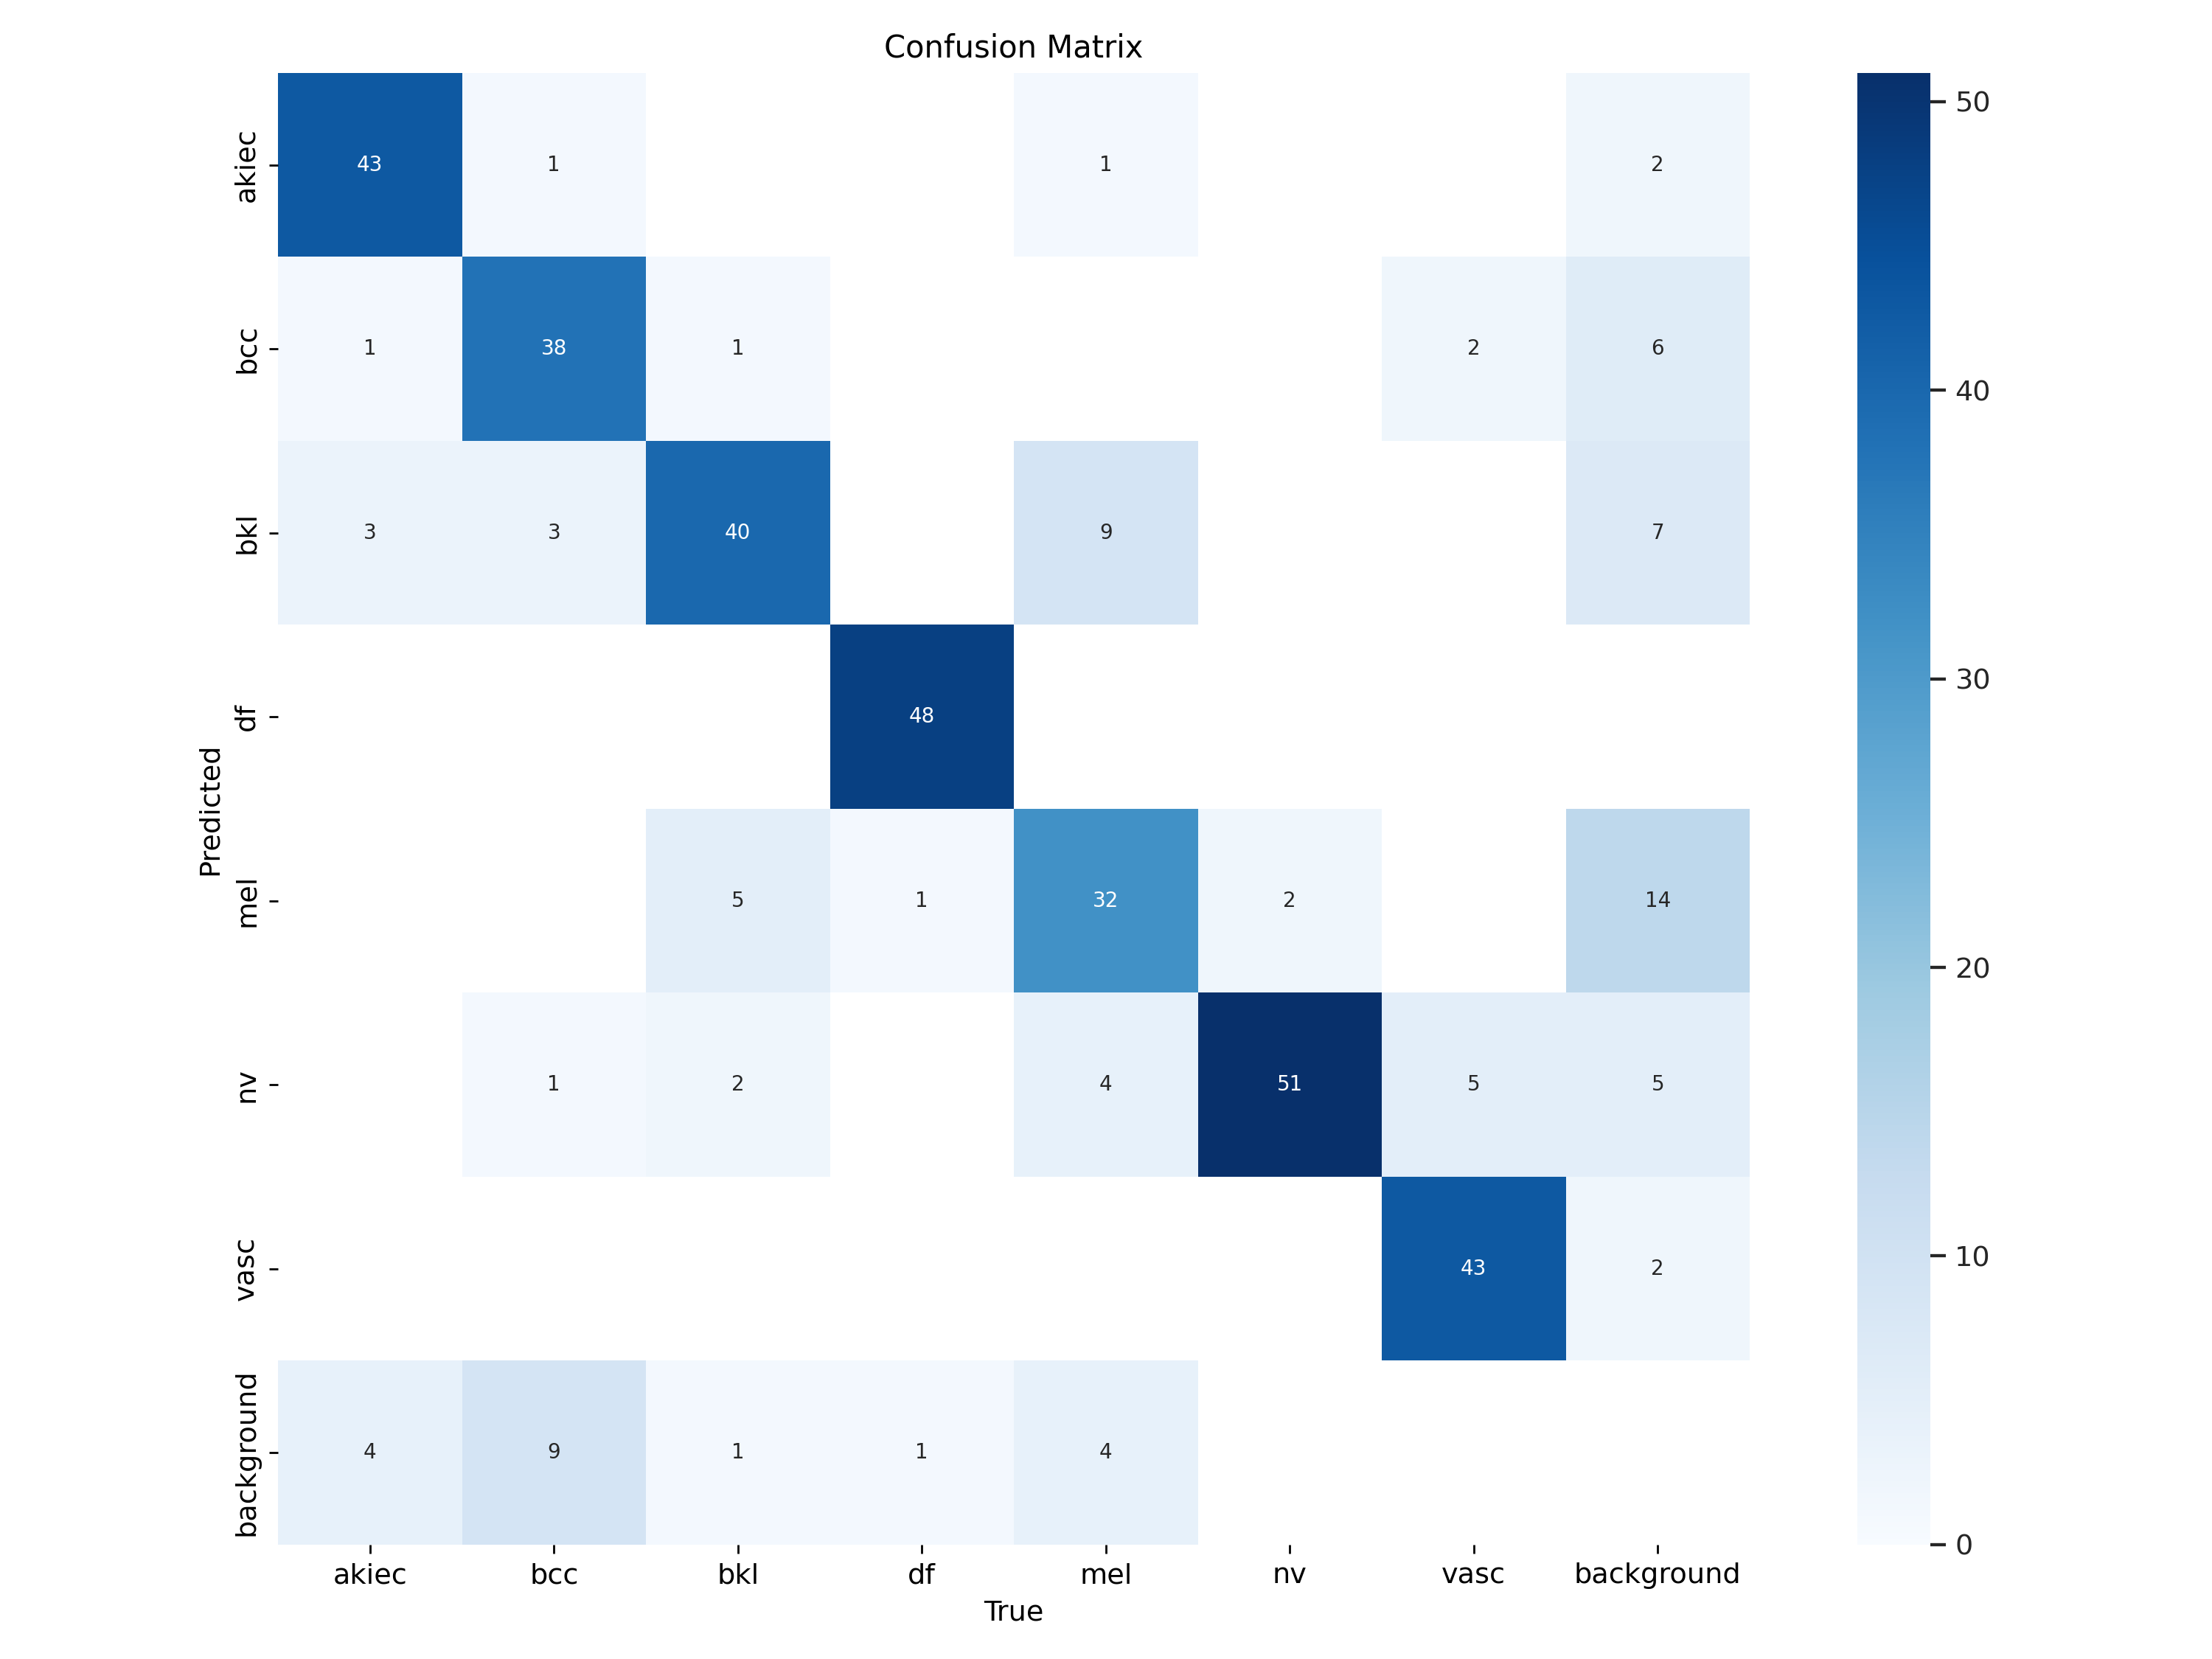

In [9]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

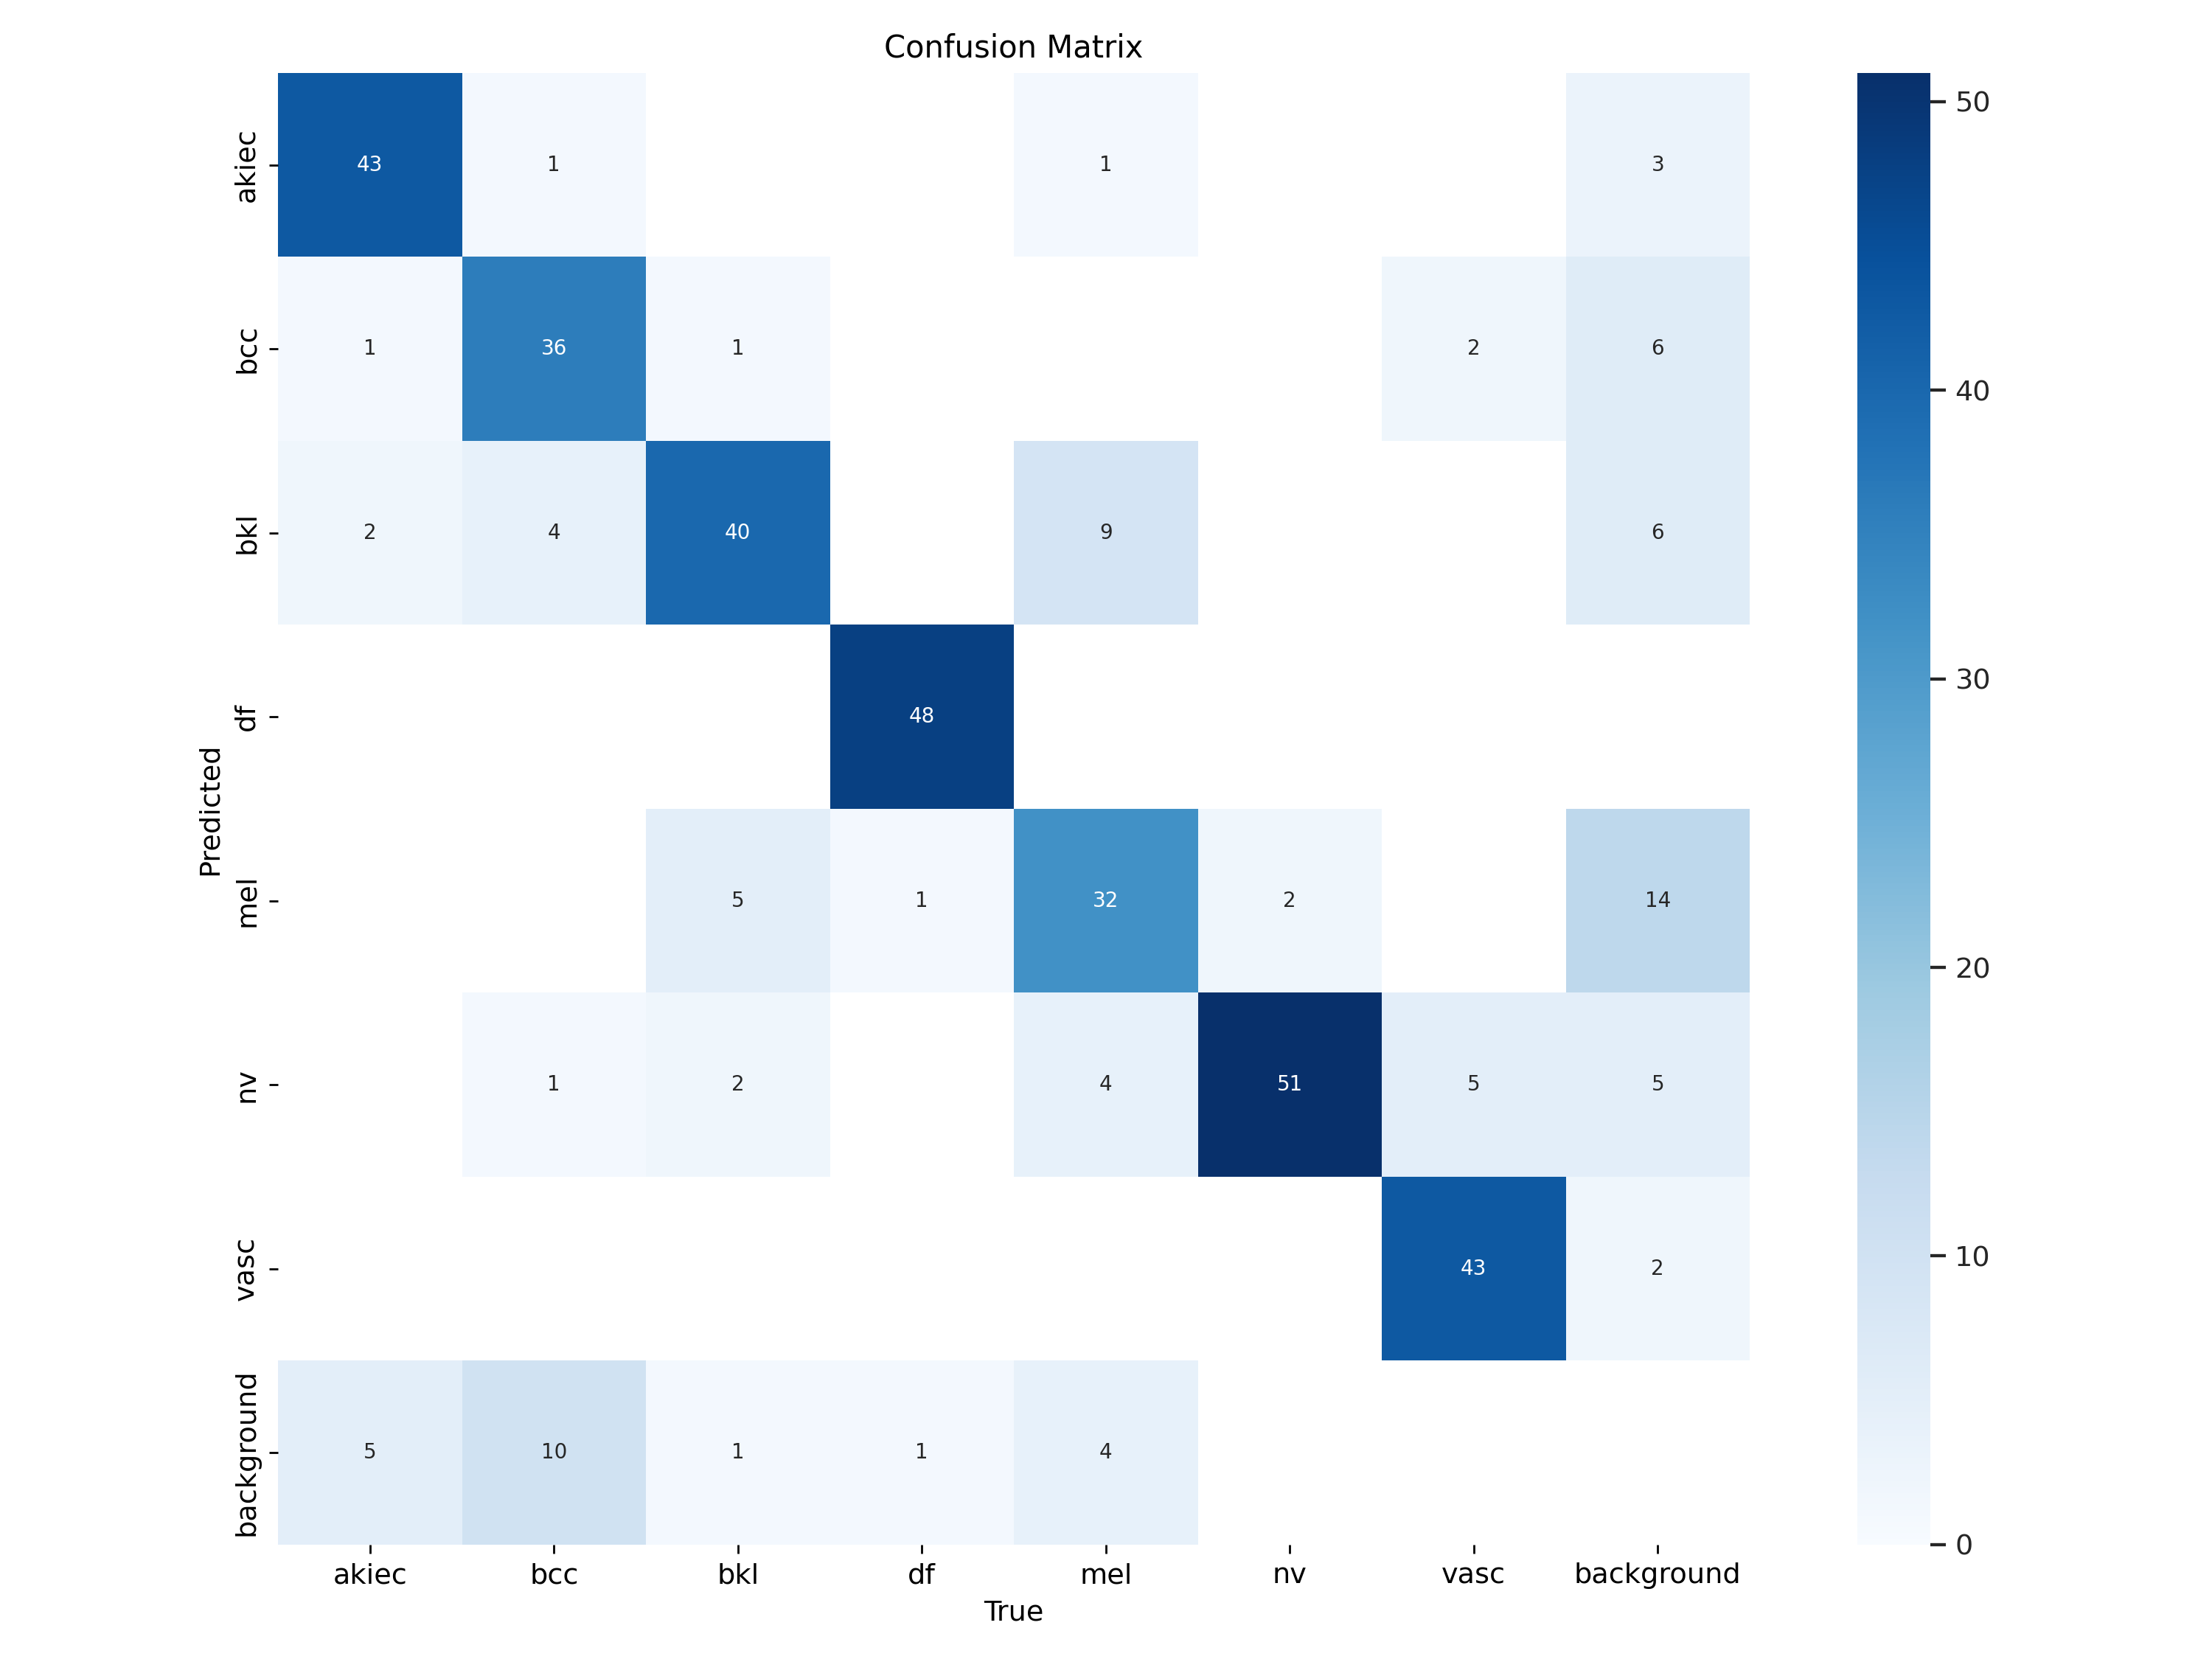

In [10]:
Image(filename=f'/content/runs/detect/val/confusion_matrix.png', width=600)

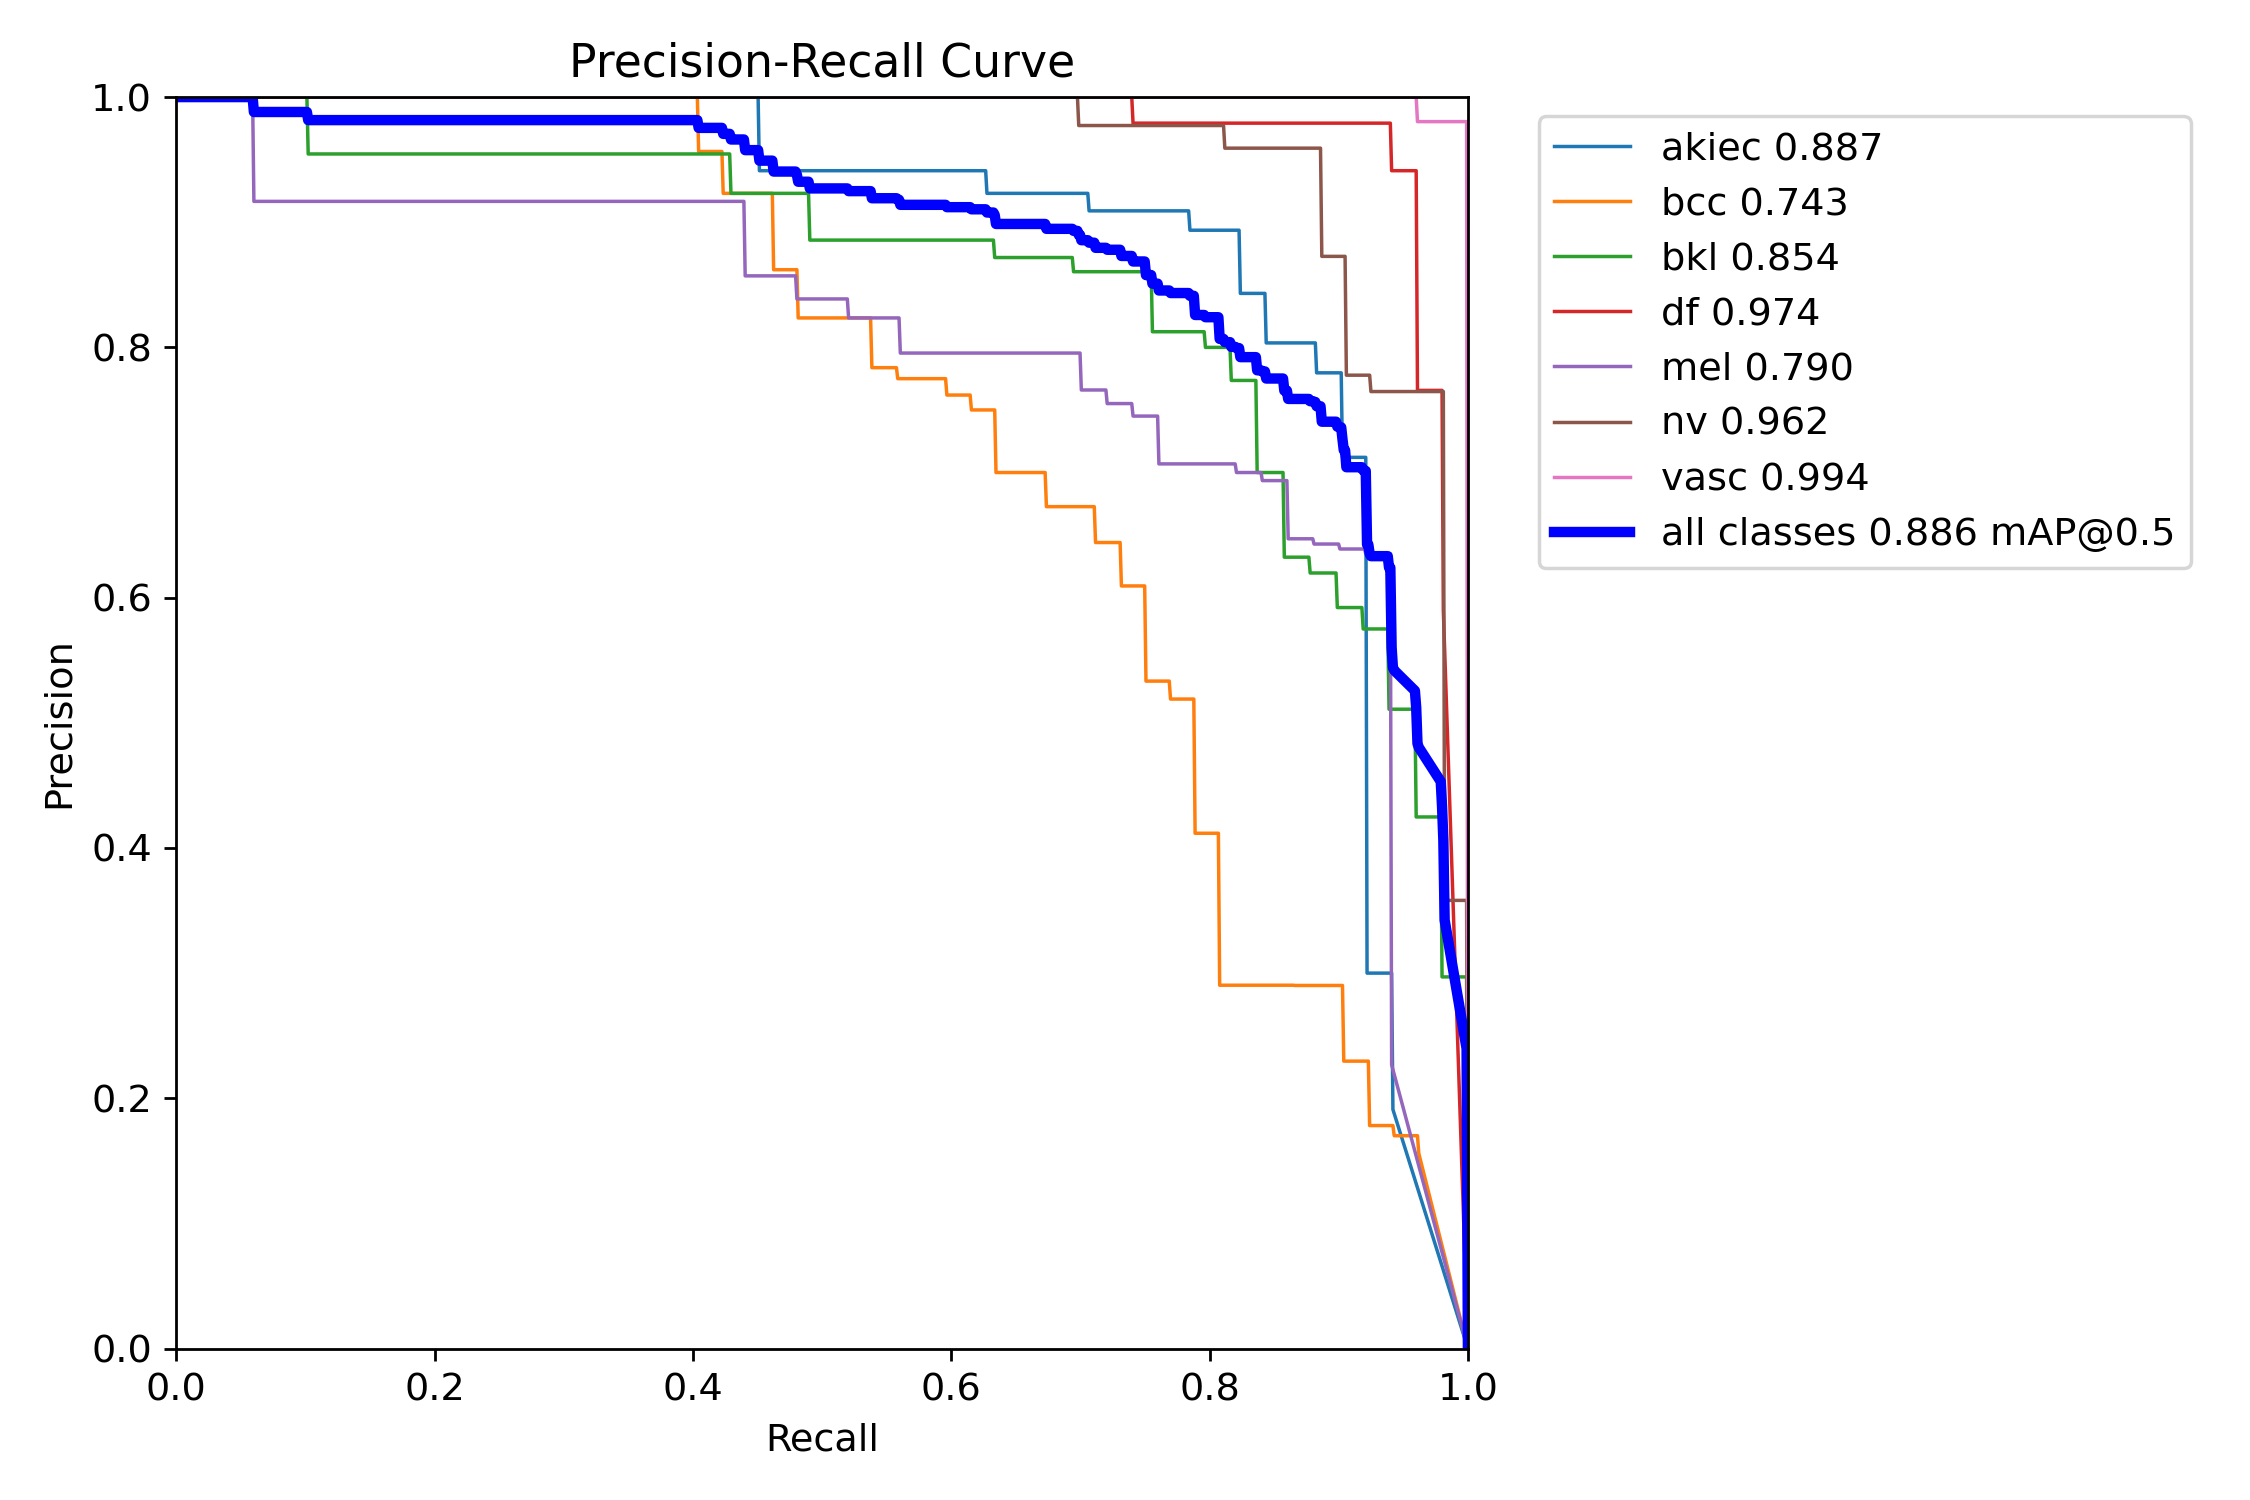

In [11]:
Image(filename=f'./runs/detect/val/PR_curve.png', width=600)

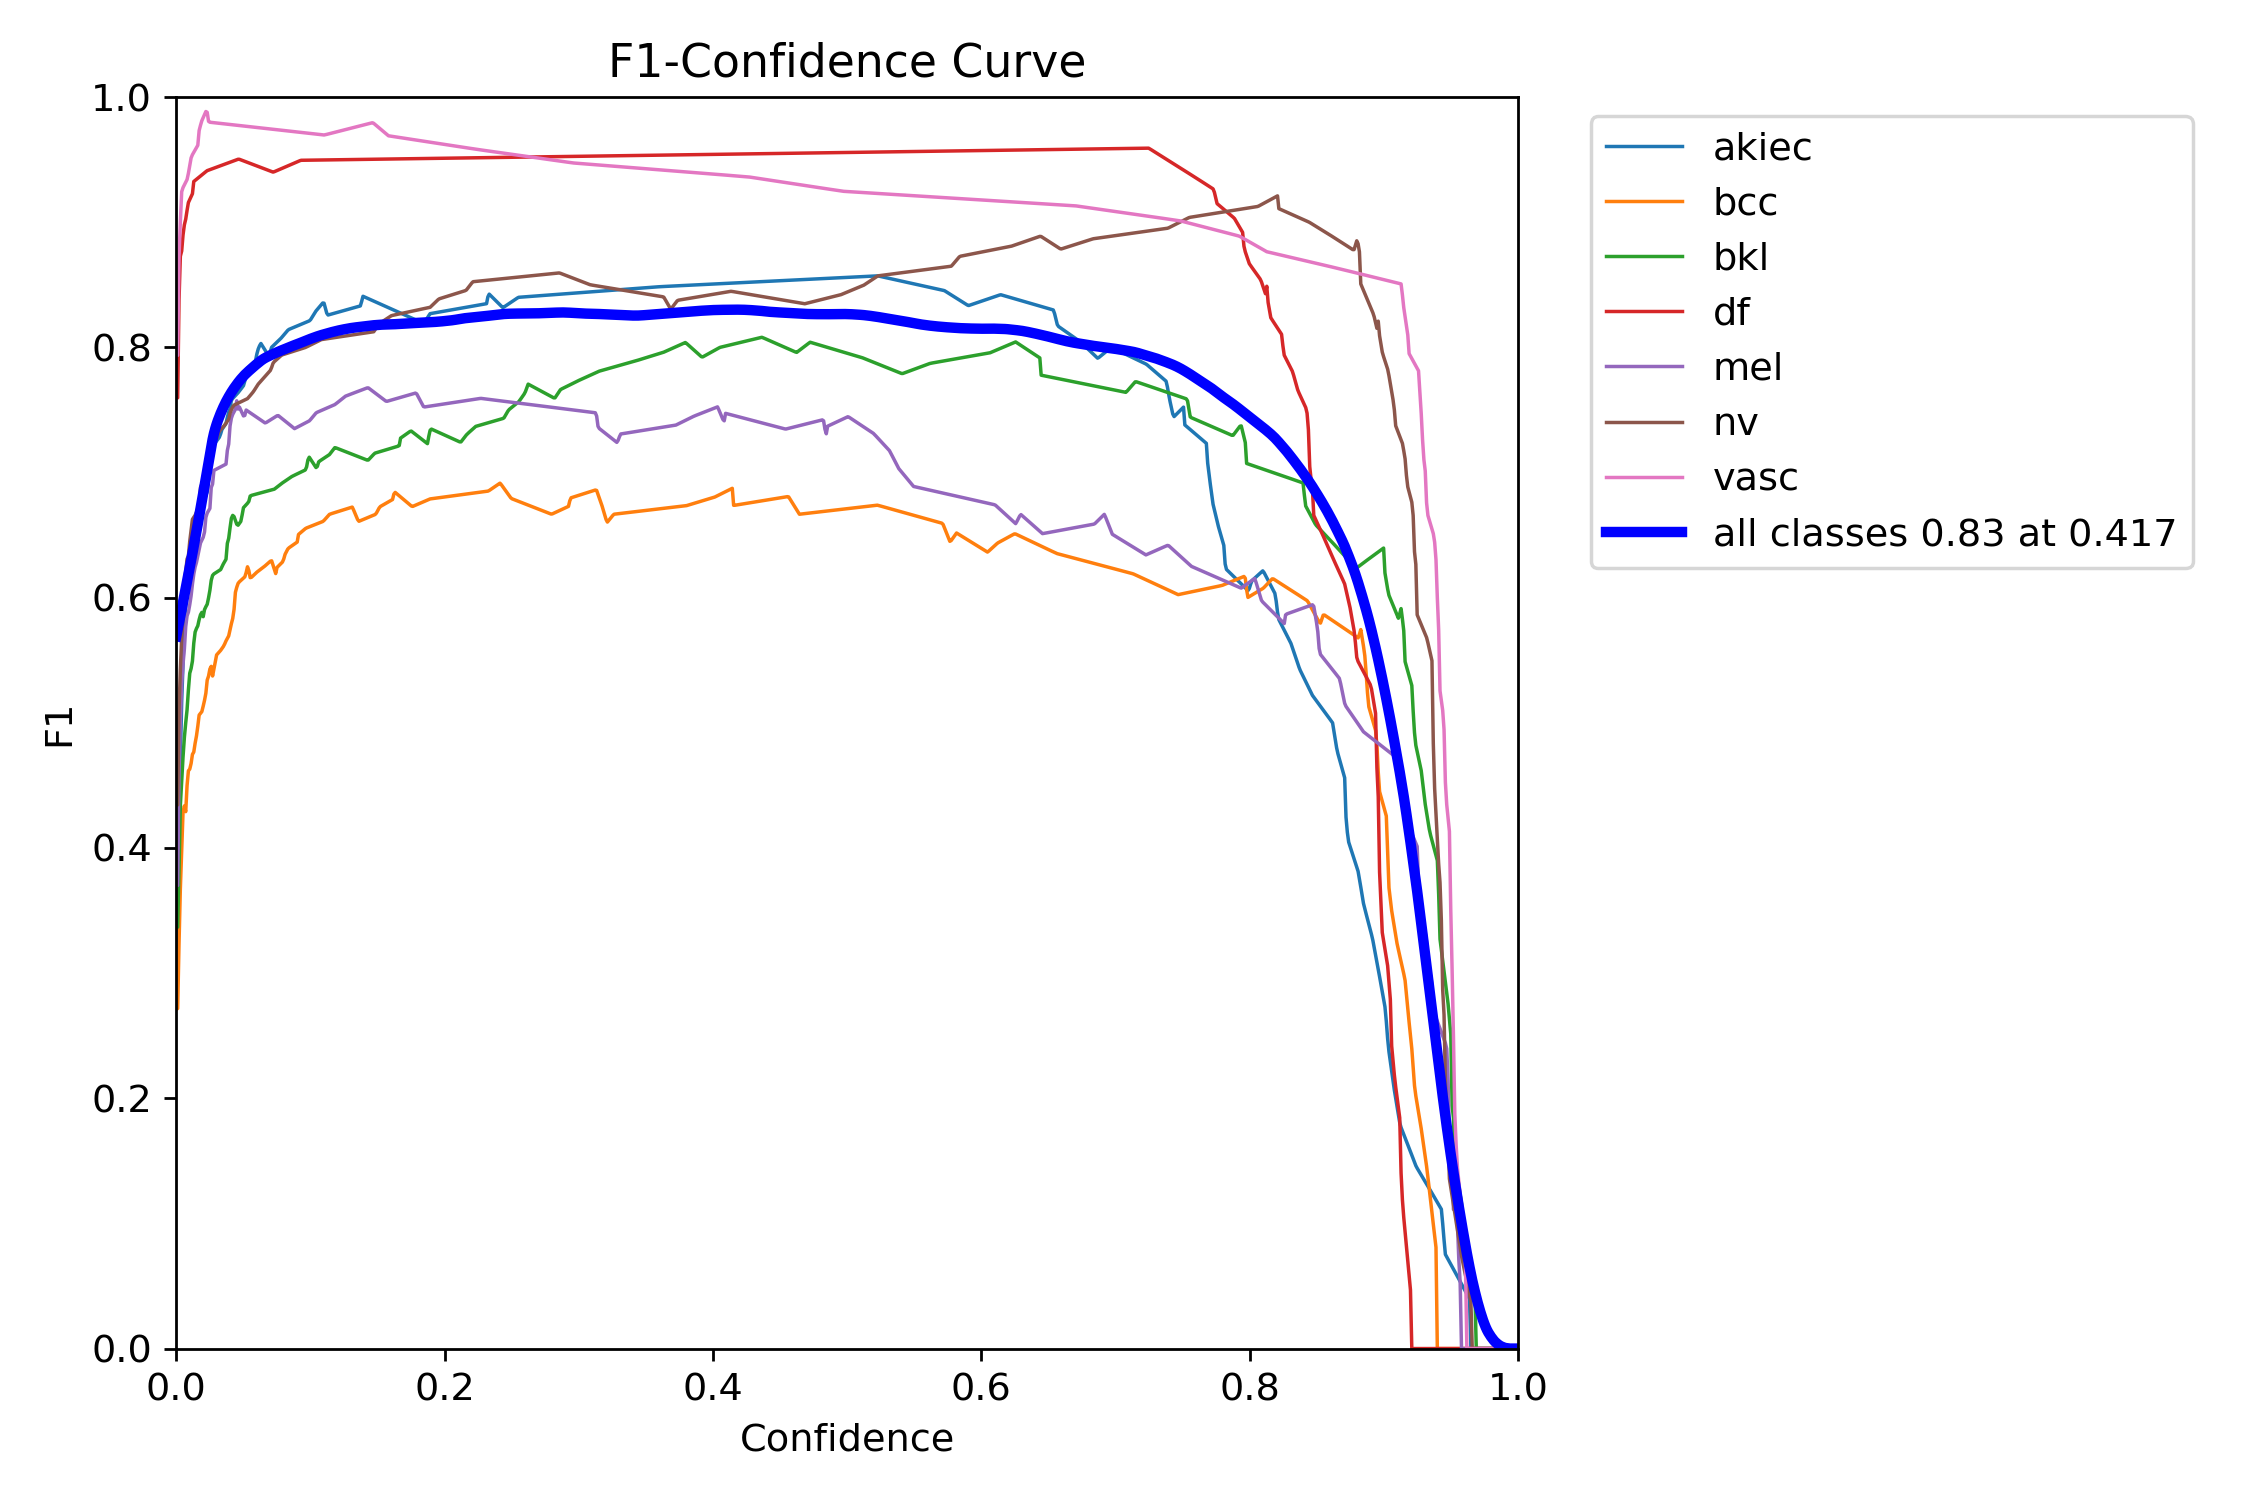

In [12]:
Image(filename=f'./runs/detect/val/F1_curve.png', width=600)